# Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer #for Imputing missing value
from sklearn.preprocessing import LabelEncoder # for encoding Gender
from sklearn.model_selection import train_test_split # for spliting data

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

# Understand Data

## Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UNIGAP/Machine Learning/Unsupervised Learning/churn_prediction.csv')
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,230
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174


## Check values and dtypes

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float']).columns
categorical_cols = df.select_dtypes(exclude=['int64', 'float']).columns
print(numeric_cols)
print(categorical_cols)

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [ ]:
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f'Column: {col}, Unique Values: {unique_vals}')

Column: PreferredLoginDevice, Unique Values: ['Mobile Phone' 'Computer' 'Phone']
Column: PreferredPaymentMode, Unique Values: ['E wallet' 'Cash on Delivery' 'Debit Card' 'UPI' 'Credit Card' 'COD' 'CC']
Column: Gender, Unique Values: ['Female' 'Male']
Column: PreferedOrderCat, Unique Values: ['Fashion' 'Laptop & Accessory' 'Mobile Phone' 'Grocery' 'Mobile' 'Others']
Column: MaritalStatus, Unique Values: ['Married' 'Single' 'Divorced']


In [ ]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone': 'Mobile Phone'})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'COD': 'Cash on Delivery','CC': 'Credit Card'})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile': 'Mobile Phone'})
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f'Column: {col}, Unique Values: {unique_vals}')

Column: PreferredLoginDevice, Unique Values: ['Mobile Phone' 'Computer']
Column: PreferredPaymentMode, Unique Values: ['E wallet' 'Cash on Delivery' 'Debit Card' 'UPI' 'Credit Card']
Column: Gender, Unique Values: ['Female' 'Male']
Column: PreferedOrderCat, Unique Values: ['Fashion' 'Laptop & Accessory' 'Mobile Phone' 'Grocery' 'Others']
Column: MaritalStatus, Unique Values: ['Married' 'Single' 'Divorced']


### check outlier

In [ ]:
data = df.copy()
for col in numeric_cols:
    data_col = data[col]
    #Tính Q1,Q3, IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    #Tính lower bound và upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #Tìm các giá trị ngoại lệ
    outliers = data_col[(data_col < lower_bound) | (data_col > upper_bound)]
    #Calculate the percentage of outliers
    outlier_pct = len(outliers) / len(data_col) * 100
    print(f'Column: {col}, lower_bound: {lower_bound}, upper_bound: {upper_bound}')

Column: CustomerID, lower_bound: 47186.5, upper_bound: 58444.5
Column: Churn, lower_bound: 0.0, upper_bound: 0.0
Column: Tenure, lower_bound: -19.0, upper_bound: 37.0
Column: CityTier, lower_bound: -2.0, upper_bound: 6.0
Column: WarehouseToHome, lower_bound: -7.5, upper_bound: 36.5
Column: HourSpendOnApp, lower_bound: 0.5, upper_bound: 4.5
Column: NumberOfDeviceRegistered, lower_bound: 1.5, upper_bound: 5.5
Column: SatisfactionScore, lower_bound: -1.0, upper_bound: 7.0
Column: NumberOfAddress, lower_bound: -4.0, upper_bound: 12.0
Column: Complain, lower_bound: -1.5, upper_bound: 2.5
Column: OrderAmountHikeFromlastYear, lower_bound: 5.5, upper_bound: 25.5
Column: CouponUsed, lower_bound: -0.5, upper_bound: 3.5
Column: OrderCount, lower_bound: -2.0, upper_bound: 6.0
Column: DaySinceLastOrder, lower_bound: -5.5, upper_bound: 14.5
Column: CashbackAmount, lower_bound: 71.0, upper_bound: 271.0


# Missing and Duplicate data

## Missing

In [ ]:
check_null = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
check_null['%missing'] = check_null[0] / len(df) * 100
check_null.columns = ['count', '%missing']
print(check_null)

                             count  %missing
DaySinceLastOrder              307  5.452931
OrderAmountHikeFromlastYear    265  4.706927
Tenure                         264  4.689165
OrderCount                     258  4.582593
CouponUsed                     256  4.547069
HourSpendOnApp                 255  4.529307
WarehouseToHome                251  4.458259
CustomerID                       0  0.000000
PreferredLoginDevice             0  0.000000
Churn                            0  0.000000
PreferredPaymentMode             0  0.000000
CityTier                         0  0.000000
SatisfactionScore                0  0.000000
PreferedOrderCat                 0  0.000000
NumberOfDeviceRegistered         0  0.000000
Gender                           0  0.000000
Complain                         0  0.000000
NumberOfAddress                  0  0.000000
MaritalStatus                    0  0.000000
CashbackAmount                   0  0.000000


In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mean_cols = ['HourSpendOnApp']
median_cols = df.columns[df.isna().sum()>0].drop('HourSpendOnApp')

imp_mean = SimpleImputer(strategy='mean')
X_train[mean_cols] = imp_mean.fit_transform(X_train[mean_cols])
X_test[mean_cols] = imp_mean.transform(X_test[mean_cols])

imp_median = SimpleImputer(strategy='median')
X_train[median_cols] = imp_median.fit_transform(X_train[median_cols])
X_test[median_cols] = imp_median.transform(X_test[median_cols])
X_full_imputed = pd.concat([X_train, X_test]).sort_index()
df.update(X_full_imputed[mean_cols + list(median_cols)])

In [ ]:
print(df.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


## Duplicate

In [ ]:
duplicate = df.duplicated().sum()
print(duplicate)

0


# Data Processing

## Encoding
- Gender: 2 unique values --> Label Encoding
- Others: one-hot encoding

In [ ]:
unique_counts = df[categorical_cols].nunique()
unique_counts

,0
PreferredLoginDevice,2
PreferredPaymentMode,5
Gender,2
PreferedOrderCat,5
MaritalStatus,3


In [ ]:
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])

onehot_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
df_encoded = pd.get_dummies(df_encoded, columns=onehot_cols, drop_first=True)
df_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,52869,0,20.0,3,7.0,0,4.0,4,5,3,...,False,False,True,False,False,False,False,False,True,False
1,52942,0,13.0,1,9.0,0,4.0,4,3,2,...,False,False,False,False,False,False,False,False,False,True
2,52972,0,16.0,3,7.0,1,3.0,4,3,3,...,False,True,False,False,False,True,False,False,False,False
3,53125,0,5.0,1,16.0,1,3.0,4,4,3,...,False,True,False,False,False,False,False,False,True,False
4,53367,0,9.0,1,28.0,0,3.0,4,2,3,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
for col in bool_cols:
    df_encoded[col] = df_encoded[col].astype(int)
df_encoded.head(5)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,52869,0,20.0,3,7.0,0,4.0,4,5,3,...,0,0,1,0,0,0,0,0,1,0
1,52942,0,13.0,1,9.0,0,4.0,4,3,2,...,0,0,0,0,0,0,0,0,0,1
2,52972,0,16.0,3,7.0,1,3.0,4,3,3,...,0,1,0,0,0,1,0,0,0,0
3,53125,0,5.0,1,16.0,1,3.0,4,4,3,...,0,1,0,0,0,0,0,0,1,0
4,53367,0,9.0,1,28.0,0,3.0,4,2,3,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
print(df_encoded.isnull().sum().sort_values(ascending=False))

CustomerID                             0
Churn                                  0
Tenure                                 0
CityTier                               0
WarehouseToHome                        0
Gender                                 0
HourSpendOnApp                         0
NumberOfDeviceRegistered               0
SatisfactionScore                      0
NumberOfAddress                        0
Complain                               0
OrderAmountHikeFromlastYear            0
CouponUsed                             0
OrderCount                             0
DaySinceLastOrder                      0
CashbackAmount                         0
PreferredLoginDevice_Mobile Phone      0
PreferredPaymentMode_Credit Card       0
PreferredPaymentMode_Debit Card        0
PreferredPaymentMode_E wallet          0
PreferredPaymentMode_UPI               0
PreferedOrderCat_Grocery               0
PreferedOrderCat_Laptop & Accessory    0
PreferedOrderCat_Mobile Phone          0
PreferedOrderCat

## Drop columns that not in use
- Customer ID

In [ ]:
df_encoded.drop(columns='CustomerID', inplace=True)
df_encoded.head(3)

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,0,20.0,3,7.0,0,4.0,4,5,3,0,...,0,0,1,0,0,0,0,0,1,0
1,0,13.0,1,9.0,0,4.0,4,3,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,16.0,3,7.0,1,3.0,4,3,3,0,...,0,1,0,0,0,1,0,0,0,0


# Churn Prediction

## Model Training

### Split dataset

In [ ]:
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape, X_test.shape, X_val.shape)

(3941, 25) (844, 25) (845, 25)


### Normalize

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

### Apply Model

#### Logistic Regression

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]
              , 'penalty': ['l1', 'l2']
              , 'solver': ['liblinear','saga']}

log_reg = LogisticRegression(max_iter=1000,)
grid_search = GridSearchCV(log_reg, param_grid, cv=kf, scoring='balanced_accuracy')
grid_search.fit(X_train_scaled, y_train)
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7556186121003912


In [ ]:
best_model = grid_search.best_estimator_
log_y_pred_test = best_model.predict(X_test_scaled)
log_y_pre_val = best_model.predict(X_val_scaled)
log_test_score = accuracy_score(y_test, log_y_pred_test)
log_val_score = accuracy_score(y_val, log_y_pre_val)
print(f'Balanced Accuracy Test: {log_test_score}')
print(f'Balanced Accuracy Validation: {log_val_score}')


Balanced Accuracy Test: 0.8779620853080569
Balanced Accuracy Validation: 0.8863905325443787


In [ ]:
print(confusion_matrix(y_test, log_y_pred_test))
print(classification_report(y_test, log_y_pred_test))

[[664  31]
 [ 72  77]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       695
           1       0.71      0.52      0.60       149

    accuracy                           0.88       844
   macro avg       0.81      0.74      0.76       844
weighted avg       0.87      0.88      0.87       844



#### KNN

In [ ]:
train_accuracies = {}
test_accuracies = {}
val_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train_scaled, y_train)
  train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
  test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)
print(train_accuracies)
print(test_accuracies)


{np.int64(1): 1.0, np.int64(2): 0.9860441512306521, np.int64(3): 0.9868053793453438, np.int64(4): 0.9576249682821619, np.int64(5): 0.9639685359045927, np.int64(6): 0.9302207561532606, np.int64(7): 0.9335194113169246, np.int64(8): 0.9051002283684344, np.int64(9): 0.9134737376300431, np.int64(10): 0.8964729764019285, np.int64(11): 0.9015478304998731, np.int64(12): 0.8888606952550114, np.int64(13): 0.8929205785333671, np.int64(14): 0.8825171276325806, np.int64(15): 0.8888606952550114, np.int64(16): 0.8756660746003553, np.int64(17): 0.8794722151738138, np.int64(18): 0.8728749048464857, np.int64(19): 0.8749048464856636, np.int64(20): 0.8678000507485409, np.int64(21): 0.8705912205024106, np.int64(22): 0.8662775945191575, np.int64(23): 0.86881502156813, np.int64(24): 0.8647551382897741, np.int64(25): 0.8662775945191575}
{np.int64(1): 0.9691943127962085, np.int64(2): 0.9241706161137441, np.int64(3): 0.9218009478672986, np.int64(4): 0.8933649289099526, np.int64(5): 0.8933649289099526, np.int64(

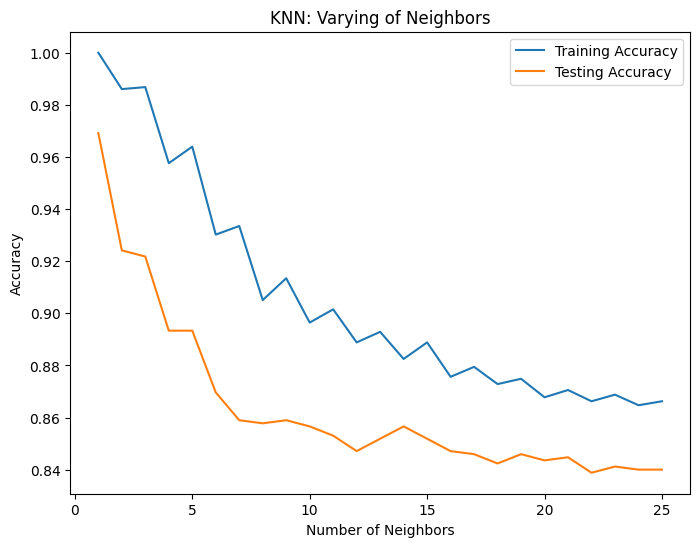

In [ ]:
plt.figure(figsize=(8,6))
plt.title("KNN: Varying of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
best_k = 2
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
knn_y_test_pred = knn.predict(X_test_scaled)
knn_y_val_pred = knn.predict(X_val_scaled)
knn_test_score = accuracy_score(y_test, knn_y_test_pred)
knn_val_score = accuracy_score(y_val, knn_y_val_pred)
print(f'Test Accuracy: {knn_test_score}')
print(f'Validation Accuracy: {knn_val_score}')

Test Accuracy: 0.9241706161137441
Validation Accuracy: 0.936094674556213


In [ ]:
print(confusion_matrix(y_test, knn_y_test_pred))
print(classification_report(y_test, knn_y_test_pred))

[[687   8]
 [ 56  93]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       695
           1       0.92      0.62      0.74       149

    accuracy                           0.92       844
   macro avg       0.92      0.81      0.85       844
weighted avg       0.92      0.92      0.92       844



#### Random Forest

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [100,150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rdf = RandomForestClassifier()
grid_search = GridSearchCV(rdf, param_grid, cv=kf, scoring='balanced_accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.9039679006785256


In [ ]:
best_rdf= grid_search.best_estimator_
rdf_y_pred_test = best_rdf.predict(X_test)
rdf_y_pre_val = best_rdf.predict(X_val)
print("Accuracy (Test):", accuracy_score(y_test, rdf_y_pred_test))
print("Accuracy (Validation):", accuracy_score(y_val, rdf_y_pre_val))

Accuracy (Test): 0.9549763033175356
Accuracy (Validation): 0.9585798816568047


In [ ]:
print(confusion_matrix(y_test, rdf_y_pred_test))
print(classification_report(y_test, rdf_y_pred_test))

[[688   7]
 [ 31 118]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       695
           1       0.94      0.79      0.86       149

    accuracy                           0.95       844
   macro avg       0.95      0.89      0.92       844
weighted avg       0.95      0.95      0.95       844



In [ ]:
print(confusion_matrix(y_val, rdf_y_pre_val))
print(classification_report(y_val, rdf_y_pre_val))

[[685   7]
 [ 28 125]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       692
           1       0.95      0.82      0.88       153

    accuracy                           0.96       845
   macro avg       0.95      0.90      0.93       845
weighted avg       0.96      0.96      0.96       845



# Importance Feature

In [ ]:
print(X.columns)

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')


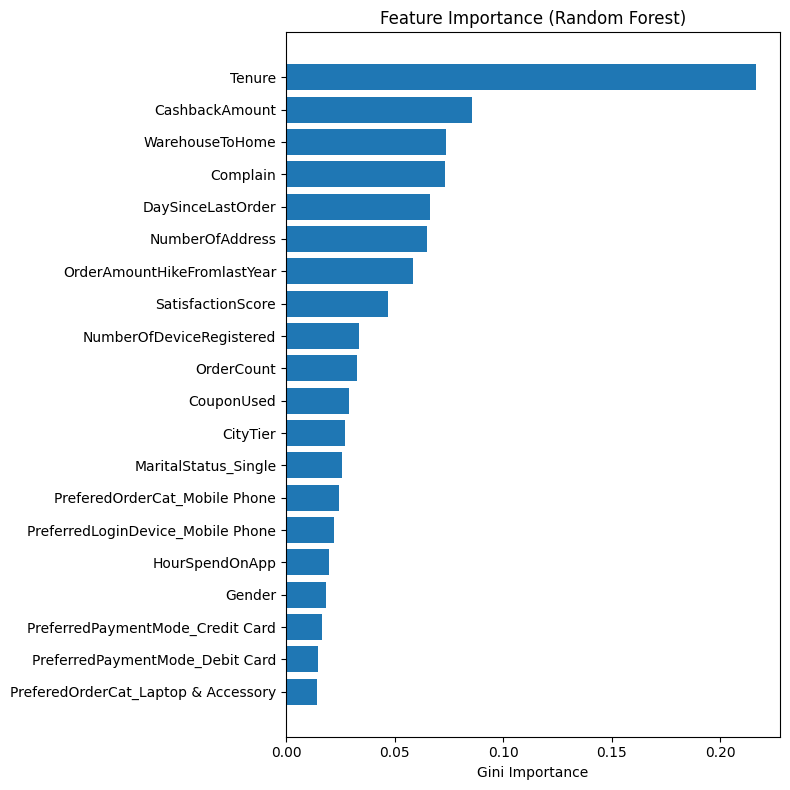

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

feats = {}
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True).reset_index()

plt.figure(figsize=(8,8))
plt.barh(importances['index'].tail(20), importances['Gini-importance'].tail(20))
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Gini Importance')
plt.tight_layout()
plt.show()

# Churn Group

## Dimension Reduction

In [ ]:
df_churned = df_encoded[df_encoded['Churn'] == 1].copy()
df_churned.head(5)

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
7,1,1.0,1,17.0,0,4.0,5,4,3,1,...,1,0,0,0,0,0,1,0,0,1
24,1,1.0,1,17.0,0,4.0,5,4,3,1,...,1,0,0,0,0,0,1,0,0,1
40,1,9.0,1,16.0,0,3.0,4,4,2,1,...,1,0,0,0,0,0,1,0,0,1
58,1,9.0,1,16.0,0,3.0,4,4,2,1,...,1,0,0,0,0,0,1,0,0,1
68,1,1.0,1,14.0,1,4.0,6,3,3,1,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
df_churned = df_churned.drop(columns=['Churn'])
df_churned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 7 to 5596
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               948 non-null    float64
 1   CityTier                             948 non-null    int64  
 2   WarehouseToHome                      948 non-null    float64
 3   Gender                               948 non-null    int64  
 4   HourSpendOnApp                       948 non-null    float64
 5   NumberOfDeviceRegistered             948 non-null    int64  
 6   SatisfactionScore                    948 non-null    int64  
 7   NumberOfAddress                      948 non-null    int64  
 8   Complain                             948 non-null    int64  
 9   OrderAmountHikeFromlastYear          948 non-null    float64
 10  CouponUsed                           948 non-null    float64
 11  OrderCount                          

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_churned)
scaled_df = pd.DataFrame(scaled_data, columns=df_churned.columns)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               948 non-null    float64
 1   CityTier                             948 non-null    float64
 2   WarehouseToHome                      948 non-null    float64
 3   Gender                               948 non-null    float64
 4   HourSpendOnApp                       948 non-null    float64
 5   NumberOfDeviceRegistered             948 non-null    float64
 6   SatisfactionScore                    948 non-null    float64
 7   NumberOfAddress                      948 non-null    float64
 8   Complain                             948 non-null    float64
 9   OrderAmountHikeFromlastYear          948 non-null    float64
 10  CouponUsed                           948 non-null    float64
 11  OrderCount                      

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

,PC1,PC2,PC3
0,0.836123,0.213175,-0.522955
1,0.837263,0.213262,-0.523893
2,0.832349,0.199104,-0.547291
3,0.833489,0.199192,-0.548229
4,0.011574,0.810084,0.516086


In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.15205712 0.14751968 0.10390105]


## Apply K-Means Model

## Which n_cluster?

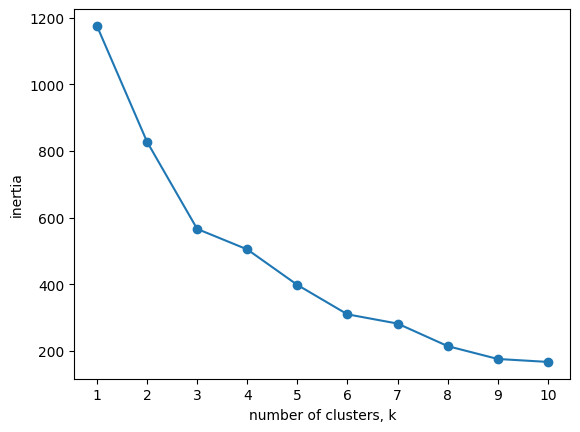

In [ ]:
ks = range(1,11)
inertias = []
for k in ks:
  model = KMeans(n_clusters=k, init='k-means++', random_state=42)
  model.fit(pca_df)
  inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Apply K-Means

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])
pca_df['Cluster'] = clusters
df_churned['Cluster'] = clusters
df_churned

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Cluster
7,1.0,1,17.0,0,4.0,5,4,3,1,26.0,...,0,0,0,0,0,1,0,0,1,2
24,1.0,1,17.0,0,4.0,5,4,3,1,26.0,...,0,0,0,0,0,1,0,0,1,2
40,9.0,1,16.0,0,3.0,4,4,2,1,25.0,...,0,0,0,0,0,1,0,0,1,2
58,9.0,1,16.0,0,3.0,4,4,2,1,25.0,...,0,0,0,0,0,1,0,0,1,2
68,1.0,1,14.0,1,4.0,6,3,3,1,25.0,...,1,0,0,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,21.0,1,9.0,1,3.0,4,4,9,1,15.0,...,1,0,0,0,0,0,1,0,1,3
5494,9.0,3,9.0,0,4.0,6,4,4,1,15.0,...,0,1,0,0,0,0,1,0,1,3
5531,5.0,1,19.0,0,3.0,4,3,3,0,15.0,...,0,0,0,0,0,0,1,1,0,1
5571,21.0,1,9.0,1,3.0,4,4,9,1,15.0,...,1,0,0,0,0,0,1,0,1,3


In [ ]:
df_churned[['CashbackAmount','Tenure','WarehouseToHome','SatisfactionScore','CouponUsed']].groupby(df_churned['Cluster']).mean().round(2)

,CashbackAmount,Tenure,WarehouseToHome,SatisfactionScore,CouponUsed
Cluster,,,,,
0,186.33,4.37,19.23,3.28,2.01
1,155.67,4.35,16.37,3.34,1.80
2,138.37,2.76,15.40,3.46,1.42
3,173.91,4.24,17.28,3.48,1.71


In [ ]:
df_churned['Cluster'].value_counts().sort_index()

,count
Cluster,
0,202
1,288
2,284
3,174


## Evaluating model

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(pca_df, clusters)
print(sil_score)

0.4801702242908709


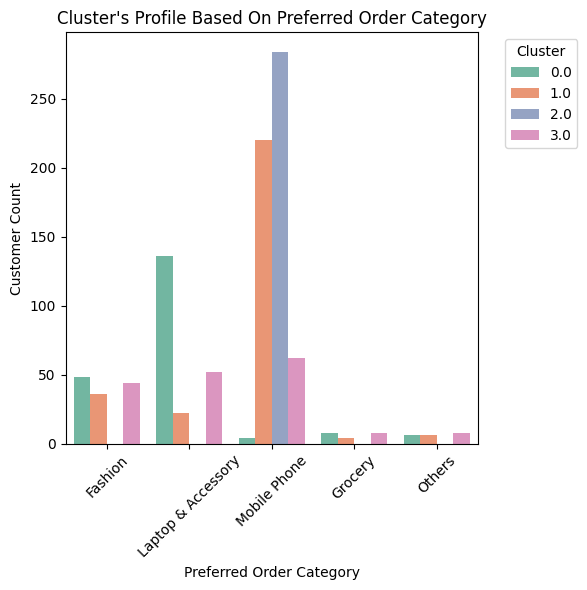

In [ ]:
plt.figure(figsize=(6,6))

sns.countplot(
    data=df,
    x="PreferedOrderCat",
    hue=df_churned["Cluster"],
    palette="Set2"
)

plt.title("Cluster's Profile Based On Preferred Order Category")
plt.xlabel("Preferred Order Category")
plt.ylabel("Customer Count")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


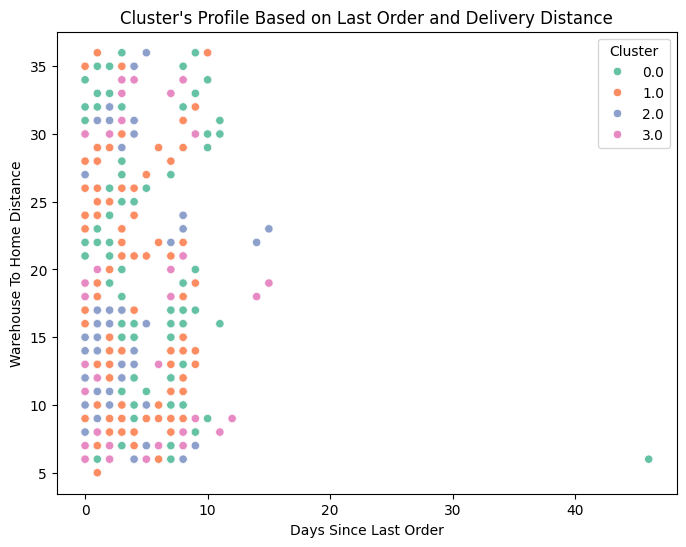

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x=df["DaySinceLastOrder"],
    y=df["WarehouseToHome"],
    hue=df_churned["Cluster"],
    palette="Set2"
)
plt.title("Cluster's Profile Based on Last Order and Delivery Distance")
plt.xlabel("Days Since Last Order")
plt.ylabel("Warehouse To Home Distance")
plt.legend(title="Cluster")
plt.show()